In [1]:
import math
import numpy
from matplotlib import pyplot
import matplotlib
%matplotlib inline

### <u><i>P1: Circulation around vortex: </i></u>

In [2]:
#Define grid parameters

N = 100
Xmin = -2.0; Xmax = 2.0
Ymin = -2.0; Ymax = 2.0

x = numpy.linspace(Xmin, Xmax, N);
y = numpy.linspace(Ymin, Ymax, N);

dx = x[1]-x[0]; dy = y[1]-y[0];

X, Y = numpy.meshgrid(x, y)

In [3]:
def add_vortex(Xp, Yp, xc, yc, strength, xvel, yvel, psivor):
    for i in range (N):
        for j in range (N):
            if (Xp[j,i]-xc != 0.0 and Yp[j,i]-yc != 0.0):
                xvel[j,i] =   strength/2.0/numpy.pi*(Yp[j,i]-yc)/((Xp[j,i]-xc)**2+(Yp[j,i]-yc)**2)
                yvel[j,i] =  -strength/2.0/numpy.pi*(Xp[j,i]-xc)/((Xp[j,i]-xc)**2+(Yp[j,i]-yc)**2)
                psivor[j,i] = strength/4.0/numpy.pi*numpy.log((Xp[j,i]-xc)**2+(Yp[j,i]-yc)**2)

In [4]:
def get_circulation(xvel, yvel, center, interval):
    
    integral = 0.0
    
    #vertical faces
    for jstep in range (2):
        tany = (-1.0)**(jstep)
        j = center-interval + 2*jstep*interval
        for i in range (center-interval,center+interval):
            vavg = 0.5*(yvel[i,j] + yvel[i+1,j])
            integral = integral + vavg*tany*dy

    #Horizontal faces
    for istep in range (2):
        tanx = (-1.0)**(istep  + 1)
        i = center-interval + 2*istep*interval
        for j in range (center-interval,center+interval):
            uavg = 0.5*(xvel[i,j] + xvel[i,j+1])
            integral = integral + uavg*tanx*dx
            
    return integral

In [5]:
xv, yv = 0.0, 0.0
u1 = numpy.zeros_like(X); v1 = numpy.zeros_like(X); psi1 = numpy.zeros_like(X);
gamma = 1.0 

add_vortex(X, Y, xv, yv, gamma, u1, v1, psi1)
velo = numpy.sqrt(u1**2+v1**2)

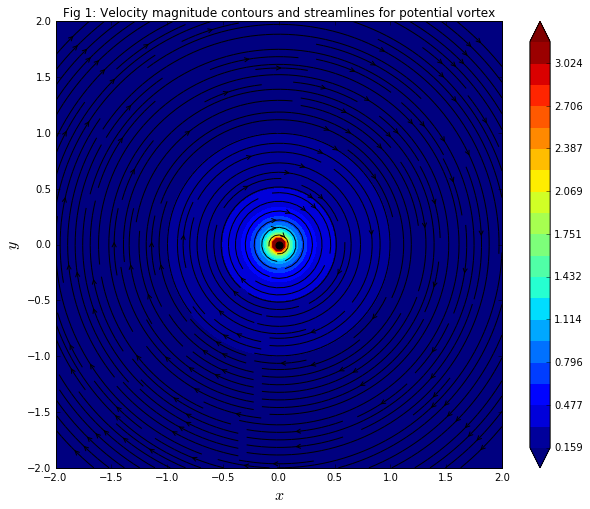

In [6]:
size = 8
pyplot.figure(figsize=(size+2, size))

pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$y$', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.contourf(X, Y, velo, levels = numpy.linspace(gamma/numpy.pi/2.0, gamma/numpy.pi/0.1, 20), extend='both')
pyplot.colorbar()
pyplot.streamplot(X, Y, u1, v1, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')
pyplot.scatter(xv, yv, color='#000000', s=50, marker='o')
pyplot.title('Fig 1: Velocity magnitude contours and streamlines for potential vortex')

### <u> Compute integral of circulation</u>:

In [7]:
center = int(N/2) - 1; interval = 20
circulation = get_circulation(u1, v1, center, interval)
print('Integral of circulation with interval ',2*interval,':', circulation)

interval = 40
circulation = get_circulation(u1, v1, center, interval)
print('Integral of circulation with interval ',2*interval,':', circulation)

Integral of circulation with interval  40 : 0.999867370632
Integral of circulation with interval  80 : 0.999966842716


Thus, it is observed that the computed integral agrees with the value of vortex strength, within certain numerical tolerance, which is intuitive. 

Further, as the size of the control volume is increased, the value of the computed integral comes closer to the true value. This is because the relative discretization error is smaller for the larger control volume.

<hr>

### <u><i>P2: Circulation around vortex</i></u>: 

In [8]:
npair = 3
u = numpy.zeros_like(X); v = numpy.zeros_like(X); 
xscat = numpy.zeros((npair,2)); yscat = numpy.zeros((npair,2))

gamma = 2.0; xv = -1.0; yv = -0.5; dxscat = 1.0; dyscat = 1.0

for ipair in range (npair):
    ucw = numpy.zeros_like(X); vcw = numpy.zeros_like(X); 
    uccw = numpy.zeros_like(X); vccw = numpy.zeros_like(X);
    psicw = numpy.zeros_like(X); psiccw = numpy.zeros_like(X); 
    
    #Define clockwise vortex:
    add_vortex(X, Y, xv, yv, gamma, ucw, vcw, psicw)
    
    #Define counterclockwise vortex
    add_vortex(X, Y, xv, yv+dyscat, -1.0*gamma, uccw, vccw, psiccw)
    
    xscat[ipair,:] = xv;
    yscat[ipair,0] = yv; yscat[ipair,1] = yv + dyscat
    
    u = u + ucw + uccw; v = v + vcw + vccw
    xv = xv + dxscat
    
velo = numpy.sqrt(u**2+v**2)

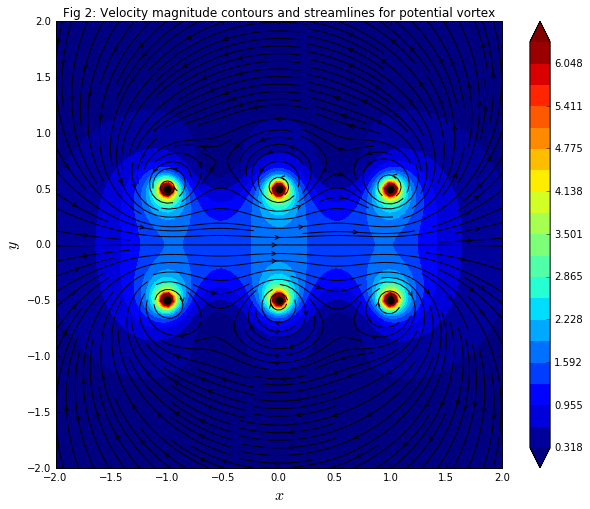

In [9]:
size = 8
pyplot.figure(figsize=(size+2, size))

pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$y$', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.contourf(X, Y, velo, levels = numpy.linspace(gamma/numpy.pi/2.0, gamma/numpy.pi/0.1, 20), extend='both')
pyplot.colorbar()
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')
pyplot.scatter(xscat[:,0], yscat[:,0], color='#000000', s=50, marker='o')
pyplot.scatter(xscat[:,1], yscat[:,1], color='#000000', s=50, marker='o')
pyplot.title('Fig 2: Velocity magnitude contours and streamlines for potential vortex')

### <u>Compute circulation</u>:

In [10]:
center = int(N/2) - 1; interval = 40

circulation = get_circulation(u, v, center, interval)

print('Integral of circulation for the system of vortex pairs:', circulation)

Integral of circulation for the system of vortex pairs: 5.13339854889e-06


In the above example, three vortex pairs, comprised of vortices of equal but opposing strengths, are placed at regular intervals. It is expected that the net circulation of the system be zero. The computed integral has a very low value $(\tilde{} 10^{-6})$, which would tend to machine zero when the discertization is sufficiently small and the control volume large enough to account for all velocity vectors.

<hr>

### <u><i>P3 (a): Approximation to infinite vortices</i></u>: 

In [11]:
#Define new grid
N = 200
Xmin = -10.0; Xmax = 10.0
Ymin = -10.0; Ymax = 10.0

x = numpy.linspace(Xmin, Xmax, N);
y = numpy.linspace(Ymin, Ymax, N);

x2 = numpy.linspace(-1.0, 1.0, N); 
y2 = numpy.linspace(-1.0, 1.0, N)

dx = x[1]-x[0]; dy = y[1]-y[0];

X, Y = numpy.meshgrid(x, y)
X2, Y2 = numpy.meshgrid(x2, y2)

In [12]:
nvortex = 41

u = numpy.zeros_like(X); v = numpy.zeros_like(X); psi = numpy.zeros_like(X)
u2 = numpy.zeros_like(X2); v2 = numpy.zeros_like(X2); psi2 = numpy.zeros_like(X2)

xscat = numpy.zeros(nvortex); yscat = numpy.zeros(nvortex)
dxscat = (Xmax-Xmin)/(nvortex-1)

gamma = 1.0; xv = Xmin; yv = 0.0;

for ivortex in range (nvortex):
    ucw = numpy.zeros_like(X); vcw = numpy.zeros_like(X); 
    ucw2 = numpy.zeros_like(X2); vcw2 = numpy.zeros_like(X2);
    psicw = numpy.zeros_like(X); psicw2 = numpy.zeros_like(X2); 
    
    #Define clockwise vortex:
    add_vortex(X, Y, xv, yv, gamma, ucw, vcw, psicw)
    u = u + ucw; v = v + vcw; psi = psi + psicw
    xscat[ivortex] = xv;
    
    add_vortex(X2, Y2, xv, yv, gamma, ucw2, vcw2, psicw2)
    u2 = u2 + ucw2; v2 = v2 + vcw2; psi2 = psi2 + psicw2
    
    xv = xv + dxscat
    
velo = numpy.sqrt(u**2+v**2)
velo2 = numpy.sqrt(u2**2+v2**2)

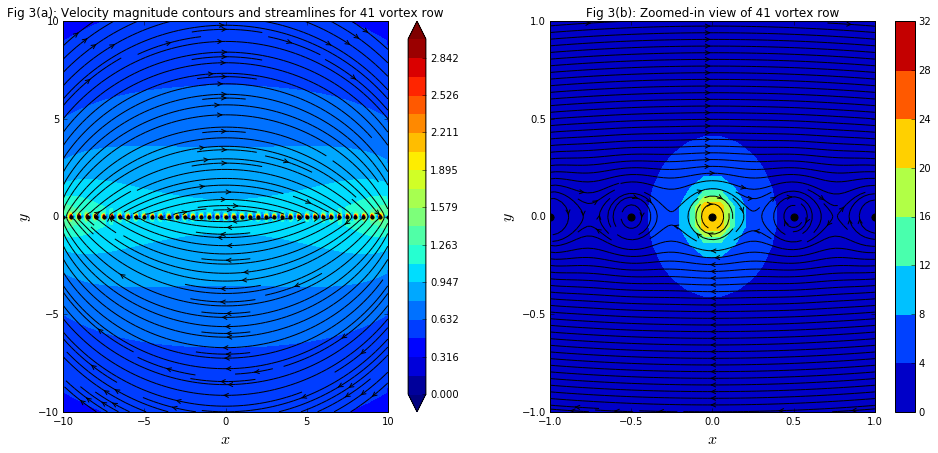

In [13]:
size = 7
pyplot.figure(figsize=(2*size+2, size))

pyplot.subplot(121)
pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$y$', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.contourf(X, Y, velo, levels = numpy.linspace(0, 3, 20), extend='both')
pyplot.colorbar()
#pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')
pyplot.scatter(xscat, yscat, color='#000000', s=10, marker='o')
pyplot.title('Fig 3(a): Velocity magnitude contours and streamlines for 41 vortex row')

pyplot.subplot(122)
pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$y$', fontsize=16)
pyplot.xlim(-1.0, 1.0)
pyplot.ylim(-1.0, 1.0)
pyplot.contourf(X, Y, velo2)
pyplot.colorbar()
pyplot.streamplot(X2, Y2, u2, v2, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')
pyplot.scatter(xscat, yscat, color='#000000', s=50, marker='o')
pyplot.title('Fig 3(b): Zoomed-in view of 41 vortex row')

In the flow patterns seen above (Fig. 3(a)), the velocity vectors curve clockwise above the row of vortices and counterclockwise below the row of vortices. In the zoomed-in view (Fig. 3(b)), we notice small circles around the centers of each vortex. The flow around any two adjacent vortex centers have opposite spins. In this view, the flow away from vortices seems almost parallel to the row of vortices. At this scale, the flow may be assumed to be parallel, flowing in one direction above the row of vortices and in the opposite direction, below the row.

<hr>

### <u><i>P3 (b): Analytical solution of infinite vortices</i></u>: 

In [14]:
#Analytical flow fields
a = dxscat

uan = numpy.zeros_like(X); uan2 = numpy.zeros_like(X2)
van = numpy.zeros_like(X); van2 = numpy.zeros_like(X2)

uan = gamma/(2.0*a)*(numpy.sinh(2.0*numpy.pi*Y/a))/ \
      (numpy.cosh(2.0*numpy.pi*Y/a) - numpy.cos(2.0*numpy.pi*X/a))
van = -gamma/(2.0*a)*(numpy.sin(2.0*numpy.pi*Y/a))/ \
      (numpy.cosh(2.0*numpy.pi*Y/a) - numpy.cos(2.0*numpy.pi*X/a))
velo_analytic = numpy.sqrt(uan**2+van**2) 
    
    
uan2 = gamma/(2.0*a)*(numpy.sinh(2.0*numpy.pi*Y2/a))/ \
      (numpy.cosh(2.0*numpy.pi*Y2/a) - numpy.cos(2.0*numpy.pi*X2/a))
van2 = -gamma/(2.0*a)*(numpy.sin(2.0*numpy.pi*Y2/a))/ \
      (numpy.cosh(2.0*numpy.pi*Y2/a) - numpy.cos(2.0*numpy.pi*X2/a))
velo_analytic2 = numpy.sqrt(uan2**2+van2**2) 

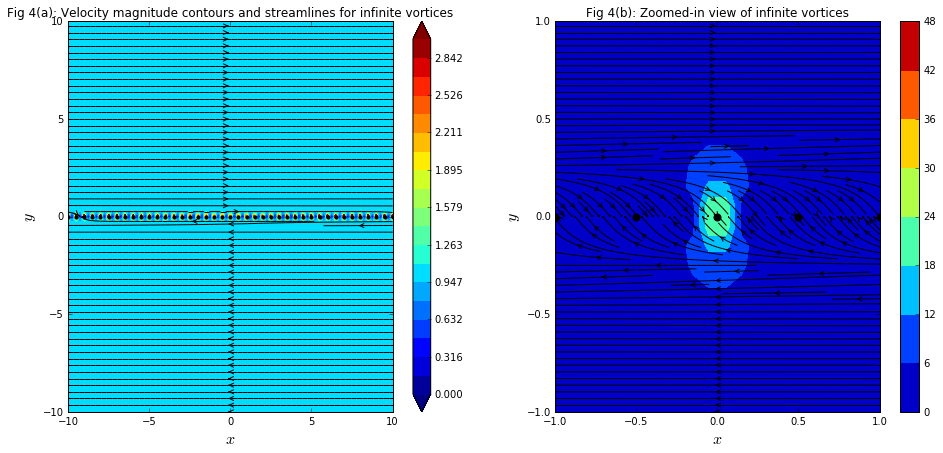

In [15]:
size = 7
pyplot.figure(figsize=(2*size+2, size))

pyplot.subplot(121)
pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$y$', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.contourf(X, Y, velo_analytic, levels = numpy.linspace(0, 3, 20), extend='both')
pyplot.colorbar()
pyplot.streamplot(X, Y, uan, van, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')
pyplot.scatter(xscat, yscat, color='#000000', s=10, marker='o')
pyplot.title('Fig 4(a): Velocity magnitude contours and streamlines for infinite vortices')

pyplot.subplot(122)
pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$y$', fontsize=16)
pyplot.xlim(-1.0, 1.0)
pyplot.ylim(-1.0, 1.0)
pyplot.contourf(X, Y, velo_analytic2)
pyplot.colorbar()
pyplot.streamplot(X2, Y2, uan2, van2, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')
pyplot.scatter(xscat, yscat, color='#000000', s=50, marker='o')
pyplot.title('Fig 4(b): Zoomed-in view of infinite vortices')

In Fig 4(a), we see the flows above and below the row of infinte vortices are parallel to the row of vortices and opposite in direction to each other. In the zoomed-in view (Fig. 4(b)), the flow around the center of vortices is not circular, but seems to transition between the upper and lower halves of the domain.  

<hr>

### <u><i>P3 (c): Pressure distribution around infinite vortices</i></u>: 

In [16]:
uinf = 5.0
psinf = uinf*Y; psinf2 = uinf*Y2

u = uan + uinf; u2 = uan2 + uinf
v = van; v2 = van2
psi = psi + psinf; psi2 = psi2 + psinf2

velo = numpy.sqrt(u**2+v**2)
velo2 = numpy.sqrt(u2**2+v2**2)

Cp = 1.0 - velo**2/uinf**2
Cp2 = 1.0 - velo2**2/uinf**2

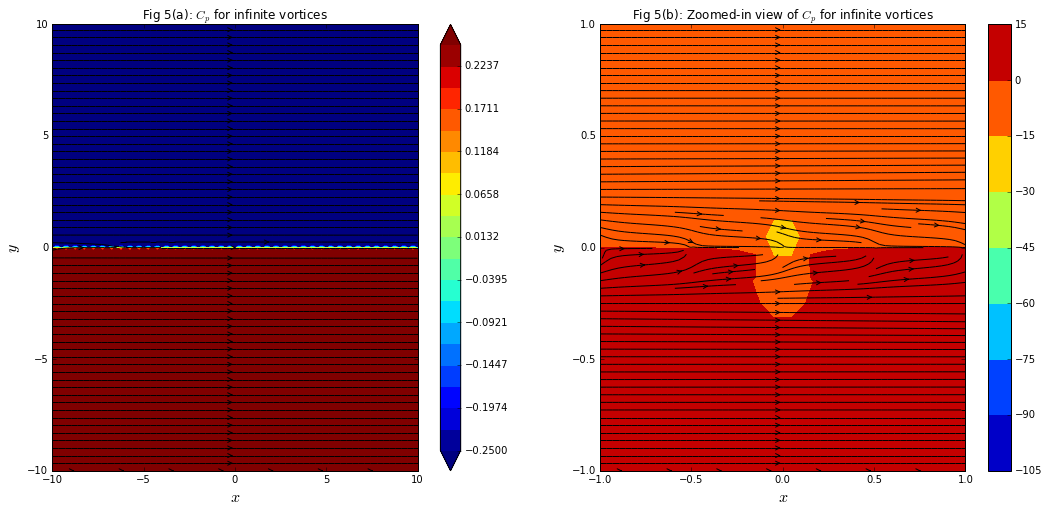

In [17]:
size = 8
pyplot.figure(figsize=(2*size+2, size))

pyplot.subplot(121)
pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$y$', fontsize=16)
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.contourf(X, Y, Cp, levels = numpy.linspace(-0.25, 0.25, 20), extend='both')
pyplot.colorbar()
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')
pyplot.title('Fig 5(a): $C_{p}$ for infinite vortices')

pyplot.subplot(122)
pyplot.xlabel('$x$', fontsize=16)
pyplot.ylabel('$y$', fontsize=16)
pyplot.xlim(-1.0, 1.0)
pyplot.ylim(-1.0, 1.0)
pyplot.contourf(X, Y, Cp2)
pyplot.colorbar()
pyplot.streamplot(X2, Y2, u2, v2, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')
pyplot.title('Fig 5(b): Zoomed-in view of $C_{p}$ for infinite vortices')

In the above plots, the flow above and below the row of infinite vortices is along the same direction as the uniform flow. By plotting the coefficient of pressure in the domain, we see $C_{p}$ above the row is lower than that below the row. Recall that before the uniform flow was superimposed on the row of infinite vortices, the flow under the row was in the direction opposite to that of the uniform flow, whereas, the flow above the row was in the same direction. 

On superimposing the uniform flow, the two opposing flows below the row leads to a slower flow, resulting in an increase in pressure. On the other hand, the flows above the row are in the same direction and does not result in an adverse pressure gradient. Thus, the pressure below the row of infinite vortices is greater than that above it. The velocity under the row is lower than that above it, but both flows follow the direction of the uniform flow.